## 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set(style='darkgrid', palette='deep')
sns.set_theme(color_codes=True)
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 2. Load Dataset

In [2]:
data = 'seattle-weather.csv'

df = pd.read_csv(data)
print(f'The shape dataset is {df.shape}')

The shape dataset is (1461, 6)


## 3. Data Understanding

In [3]:
df.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [5]:
nums = [i for i in df.columns if df[i].dtypes == 'float64']

df[nums].describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [6]:
df.weather.unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

## 4. Data Cleansing

In [7]:
df.isnull().sum() * 100 / len(df)

date             0.0
precipitation    0.0
temp_max         0.0
temp_min         0.0
wind             0.0
weather          0.0
dtype: float64

In [8]:
df.duplicated().sum()

0

## 5. Exploratory Data Analysis (EDA)

In [9]:
df2 = df.copy()

df2['date'] = pd.to_datetime(df2['date'])
df2 = df2.set_index('date')
df2

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,rain
2015-12-28,1.5,5.0,1.7,1.3,rain
2015-12-29,0.0,7.2,0.6,2.6,fog


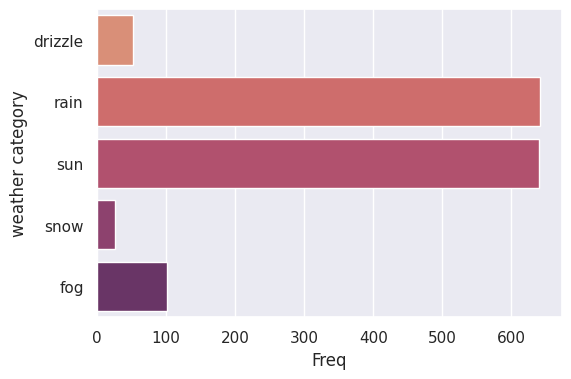

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df2, y='weather', palette='flare')
plt.ylabel('weather category')
plt.xlabel('Freq')
plt.show()

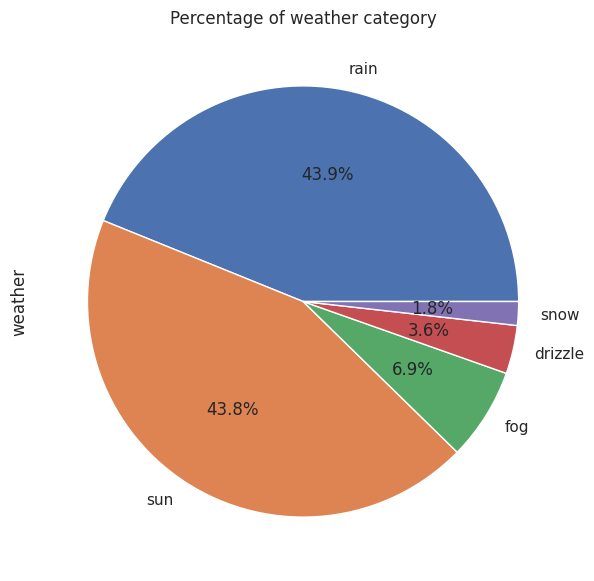

In [11]:
plt.figure(figsize=(7,7))
df2['weather'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of weather category')
plt.show()

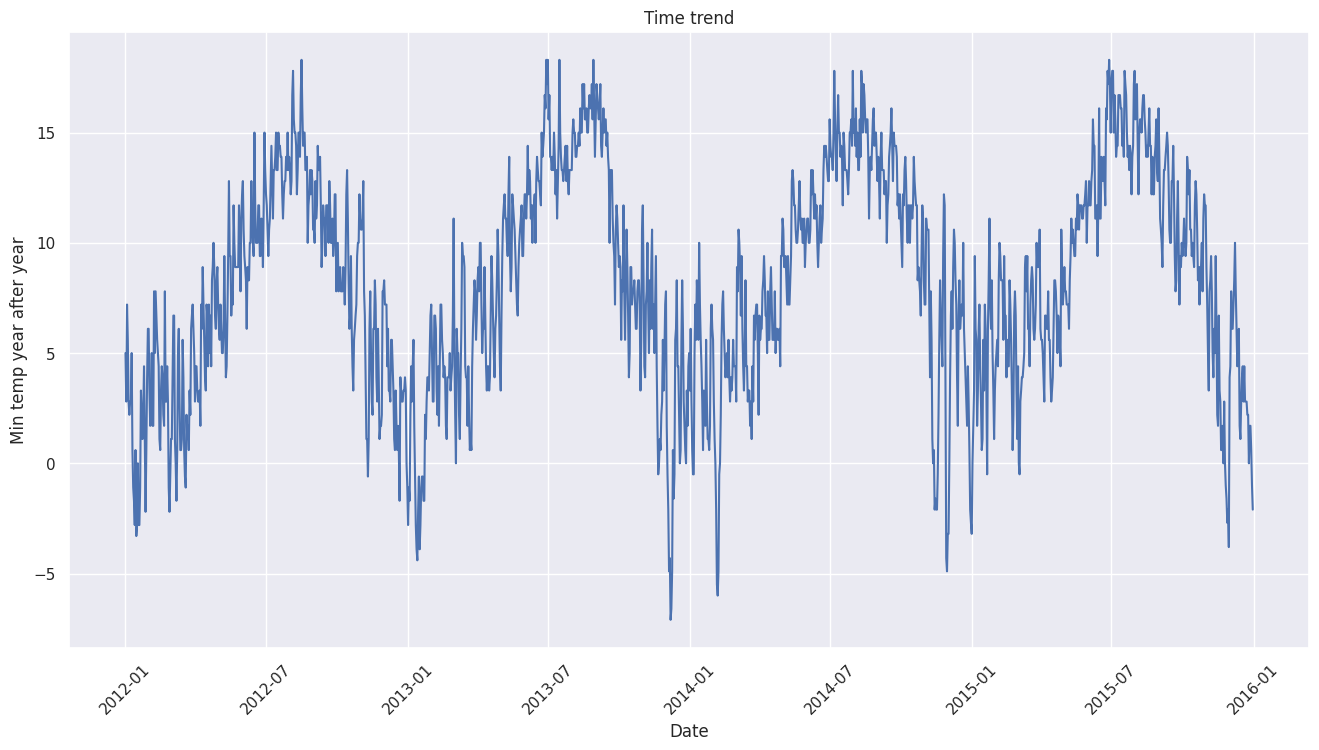

In [12]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=df2, x='date', y='temp_min')
plt.title('Time trend')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Min temp year after year')
plt.show()

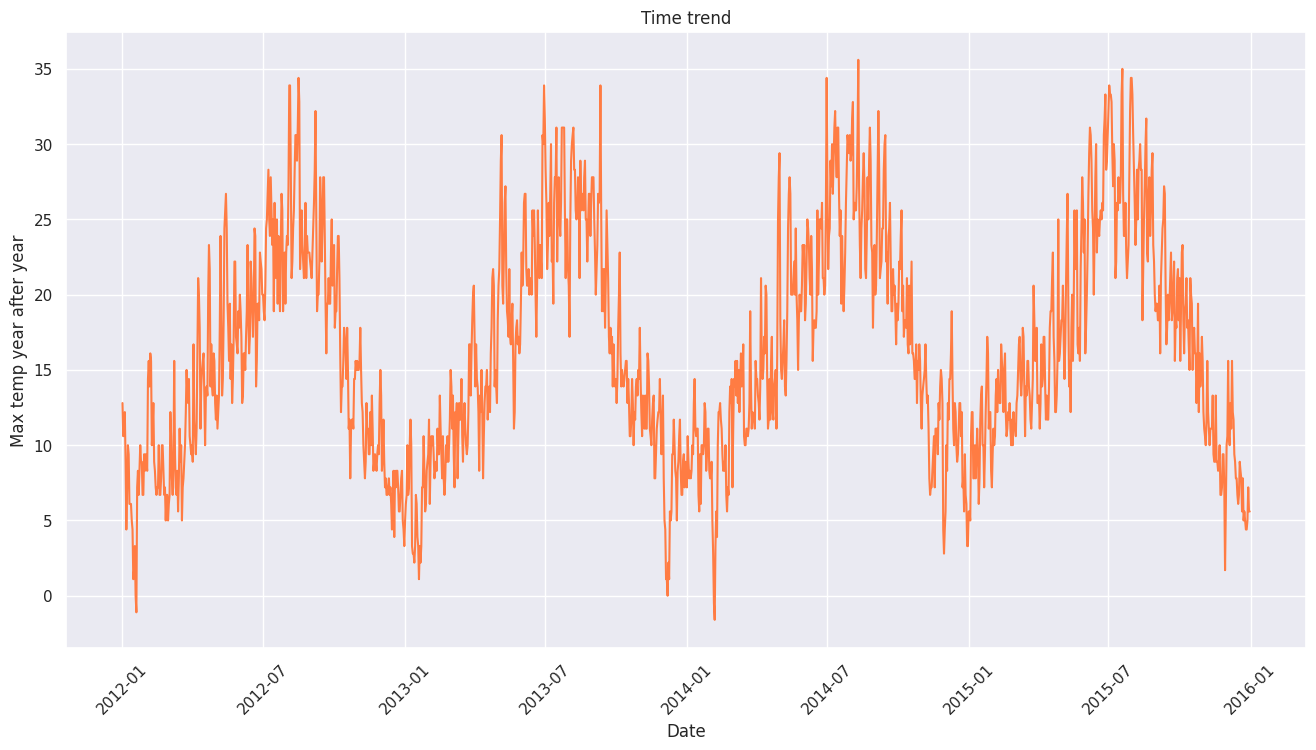

In [13]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=df2, x='date', y='temp_max', color='#ff7c43')
plt.title('Time trend')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Max temp year after year')
plt.show()

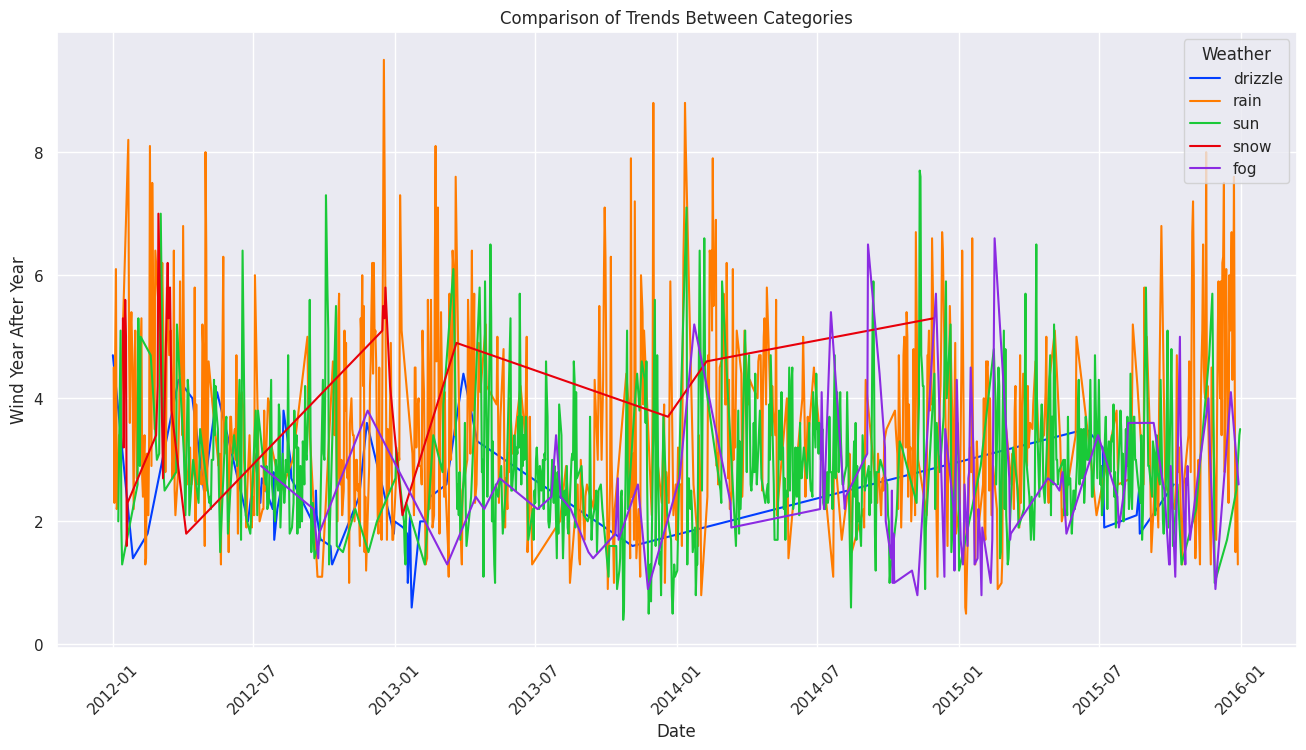

In [14]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=df2, x='date', y='wind', hue='weather', palette='bright')
plt.title('Comparison of Trends Between Categories')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Wind Year After Year')
plt.legend(title='Weather')
plt.show()

## 6. Data Preprocessing

In [15]:
df_final = df.iloc[:, 1:6]
df_final.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


In [16]:
le = LabelEncoder()

df_final['weather'] = le.fit_transform(df_final['weather'])
df_final.sample(3)

,precipitation,temp_max,temp_min,wind,weather
1198,14.0,11.7,3.9,3.6,2
978,0.0,27.8,13.9,6.5,1
967,0.0,28.9,14.4,2.0,4


**Label**

0 = drizzle

1 = fog

2 = rain

3 = snow

4 = sun



In [17]:
X = df_final.drop('weather', axis=1)
y = df_final['weather']

print('Shape X : ', X.shape)
print('Shape y : ', y.shape)

Shape X :  (1461, 4)
Shape y :  (1461,)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_tes : {y_test.shape}')

X_train : (1168, 4)
y_train : (1168,)
X_test : (293, 4)
y_tes : (293,)


## 7. Modelling & Evaluation

In [20]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
KNN_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print('Accuracy Model KNN : {:.2f}%'.format(KNN_acc * 100))

              precision    recall  f1-score   support

           0       0.10      0.11      0.11         9
           1       0.35      0.24      0.29        25
           2       0.90      0.86      0.88       120
           3       0.67      0.25      0.36         8
           4       0.76      0.86      0.81       131

    accuracy                           0.77       293
   macro avg       0.56      0.46      0.49       293
weighted avg       0.76      0.77      0.76       293

Accuracy Model KNN : 76.79%


## 8. Testing

In [28]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [33]:
data_tes = pd.DataFrame({
    'precipitation': [5.4],
    'temp_max': [14.2],
    'temp_min': [8.4],
    'wind': [5.5]
})

data_tes

,precipitation,temp_max,temp_min,wind
0,5.4,14.2,8.4,5.5


In [35]:
tes_pred = knn.predict(data_tes)

print(f'Predict Result : {tes_pred}')

Predict Result : [2]
